In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
tips = sns.load_dataset('tips')

In [4]:
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

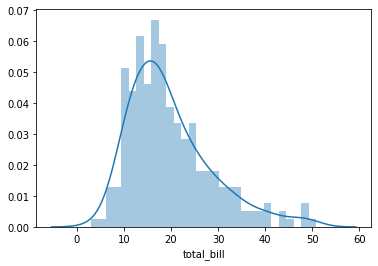

In [8]:
# dist plot - univariate analysis
sns.distplot(tips['total_bill'], kde=True, bins=30)

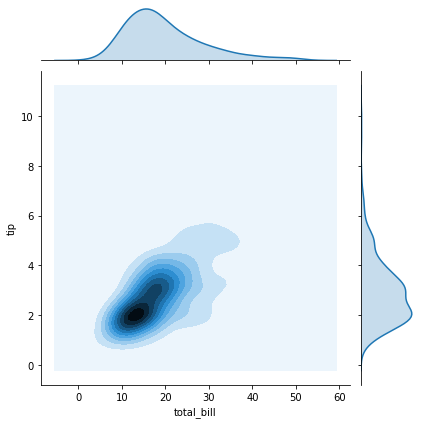

In [12]:
# for bivariate analysis
sns.jointplot(tips['total_bill'], tips['tip'],kind='reg')
#kind = scatter, hex, kde
#alternatively, we can mention x, y and data  
#sns.jointplot(x=total_bill, y='tips, data=tips)

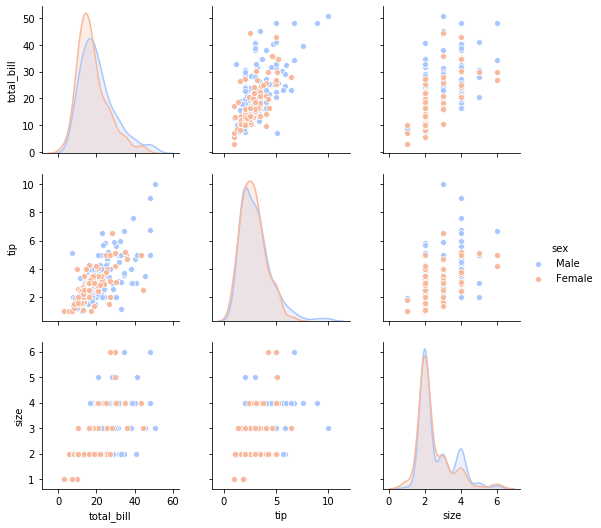

In [17]:
# pair plot for all the possible combination
# works best for 3 or max 4 features
# hue is for categorical columns
sns.pairplot(data=tips, hue='sex', palette='coolwarm')

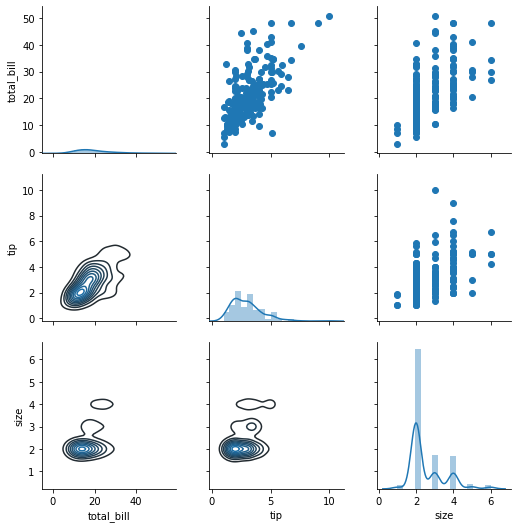

In [73]:
# for futher cutomization of pairplots
g = sns.PairGrid(tips)
#g.map(plt.scatter)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

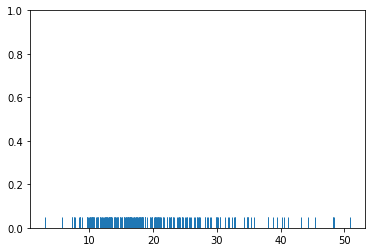

In [18]:
sns.rugplot(tips['total_bill'])

In [66]:
# sns for categorical variables
print(tips['time'].value_counts())
print(tips['time'].unique())
print('\n')
print(tips['sex'].value_counts())
print('\n')
print(tips['smoker'].value_counts())
print(tips['smoker'].unique())

print('\n')
print(tips['day'].value_counts())

Dinner    176
Lunch      68
Name: time, dtype: int64
[Dinner, Lunch]
Categories (2, object): [Dinner, Lunch]


Male      157
Female     87
Name: sex, dtype: int64


No     151
Yes     93
Name: smoker, dtype: int64


Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64


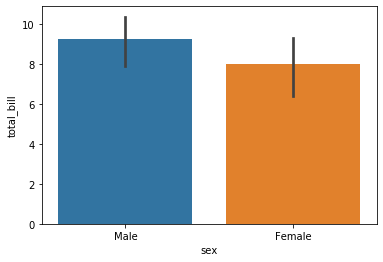

In [25]:
# barplot x=categorical and y=numerical col
#estimator obj = Stat function/grouping for avg or mean of total bill male v/s female
# we can add own stat function - group by 
sns.barplot(x='sex', y='total_bill', data=tips, estimator=np.std)

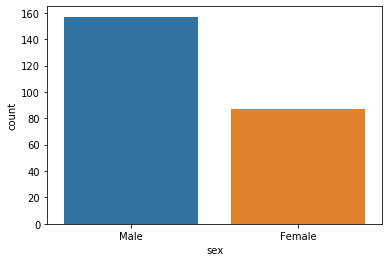

In [27]:
# countplot is same as bar plot 
# but estimator is counting number of occurences
# same as value counts - refer to above value_counts()
sns.countplot(x='sex', data=tips)

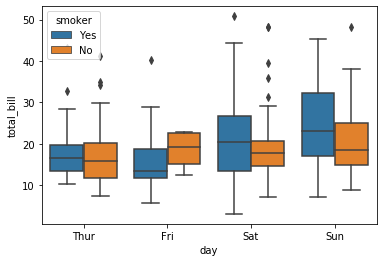

In [29]:
# box&Violin - Shows distribution of categorical data
#box - to compare between variables
#x = categorical and y = numeric
sns.boxplot(x='day',y='total_bill',data=tips, hue='smoker')

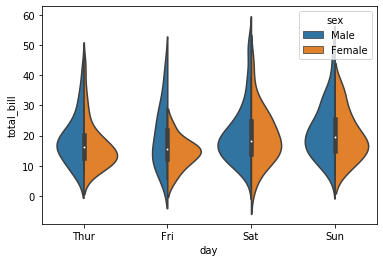

In [32]:
sns.violinplot(x='day', y='total_bill', data=tips, hue='sex', split=True)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


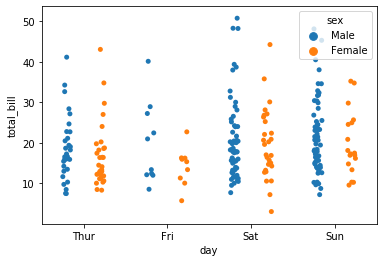

In [36]:
# strip plot where one data is categorical
# add jitter for random noise for seperating these points
sns.stripplot(x='day', y="total_bill", data=tips, jitter=True, hue='sex', split=True)

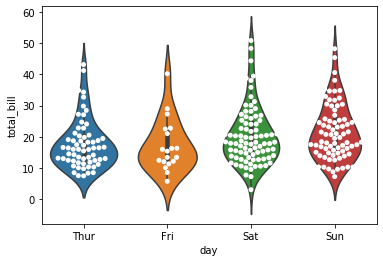

In [41]:
#combining strip plot and violin plot
# does not scale for large data sets
sns.violinplot(x='day', y='total_bill', data=tips)
sns.swarmplot(x='day', y='total_bill', data=tips, color='white')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


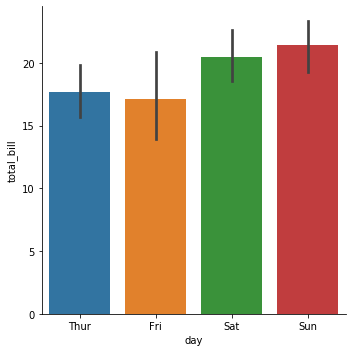

In [42]:
# general form 
sns.factorplot(x='day', y='total_bill', data=tips, kind='bar')  

In [46]:
# matrix plots
 tips = sns.load_dataset('tips')
 flights = sns.load_dataset('flights')

print(tips.head(4))
print('\n')
print(flights.head(4))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2


   year     month  passengers
0  1949   January         112
1  1949  February         118
2  1949     March         132
3  1949     April         129


In [0]:
# for matrix we want to convert this to matrix form
# 2 methods - using corr and using pivot

tcorr = tips.corr()

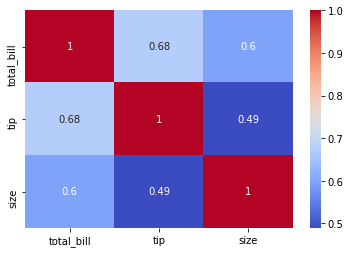

In [53]:
sns.heatmap(tcorr, annot=True, cmap='coolwarm')

In [0]:
# using pivot
fpivot = flights.pivot_table(index='month', columns='year', values='passengers')

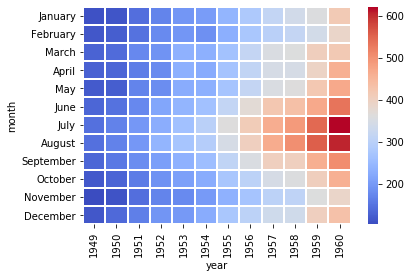

In [61]:
#cmap = 'magma'
sns.heatmap(fpivot,cmap='coolwarm',linecolor='white', linewidths=1)

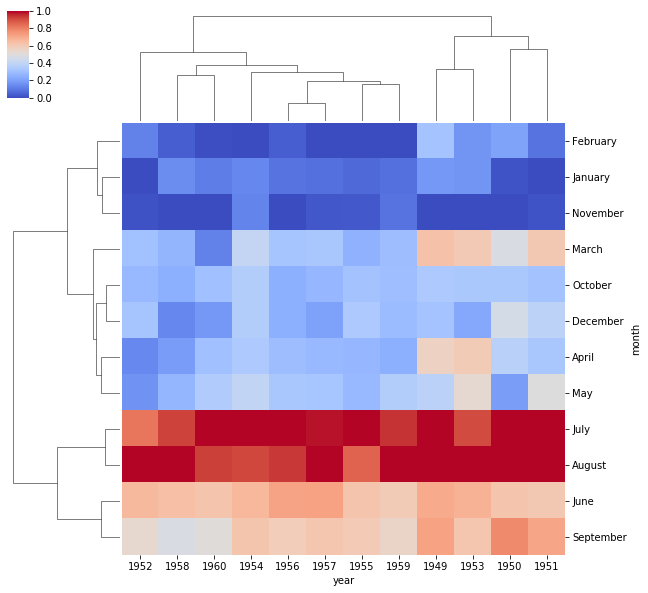

In [65]:
  # using clustering 
  sns.clustermap(fpivot, cmap='coolwarm', standard_scale=1)

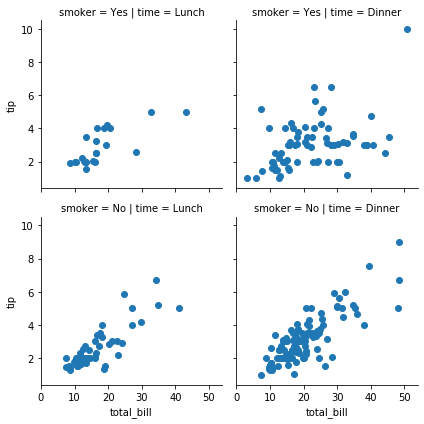

In [78]:
#grids
g = sns.FacetGrid(data=tips, col='time', row='smoker')
#g.map(sns.distplot, 'total_bill')
# separating lunch/dinner with smoker along with 
# total_bill and tip col
g.map(plt.scatter, 'total_bill', 'tip') 

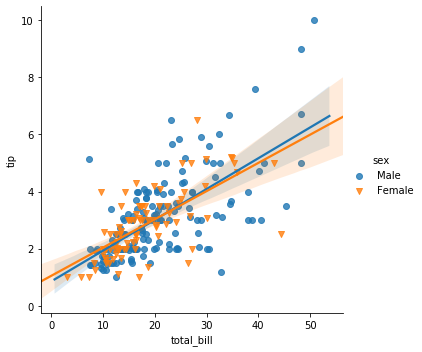

In [85]:
# regression plots
# linear model with sns
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', markers=['o', 'v']) 

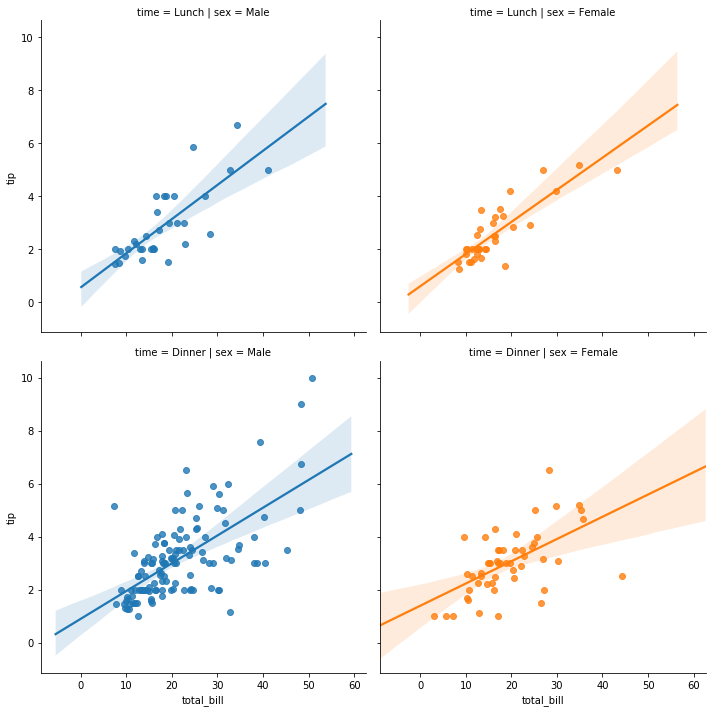

In [89]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', col='sex', row='time')

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


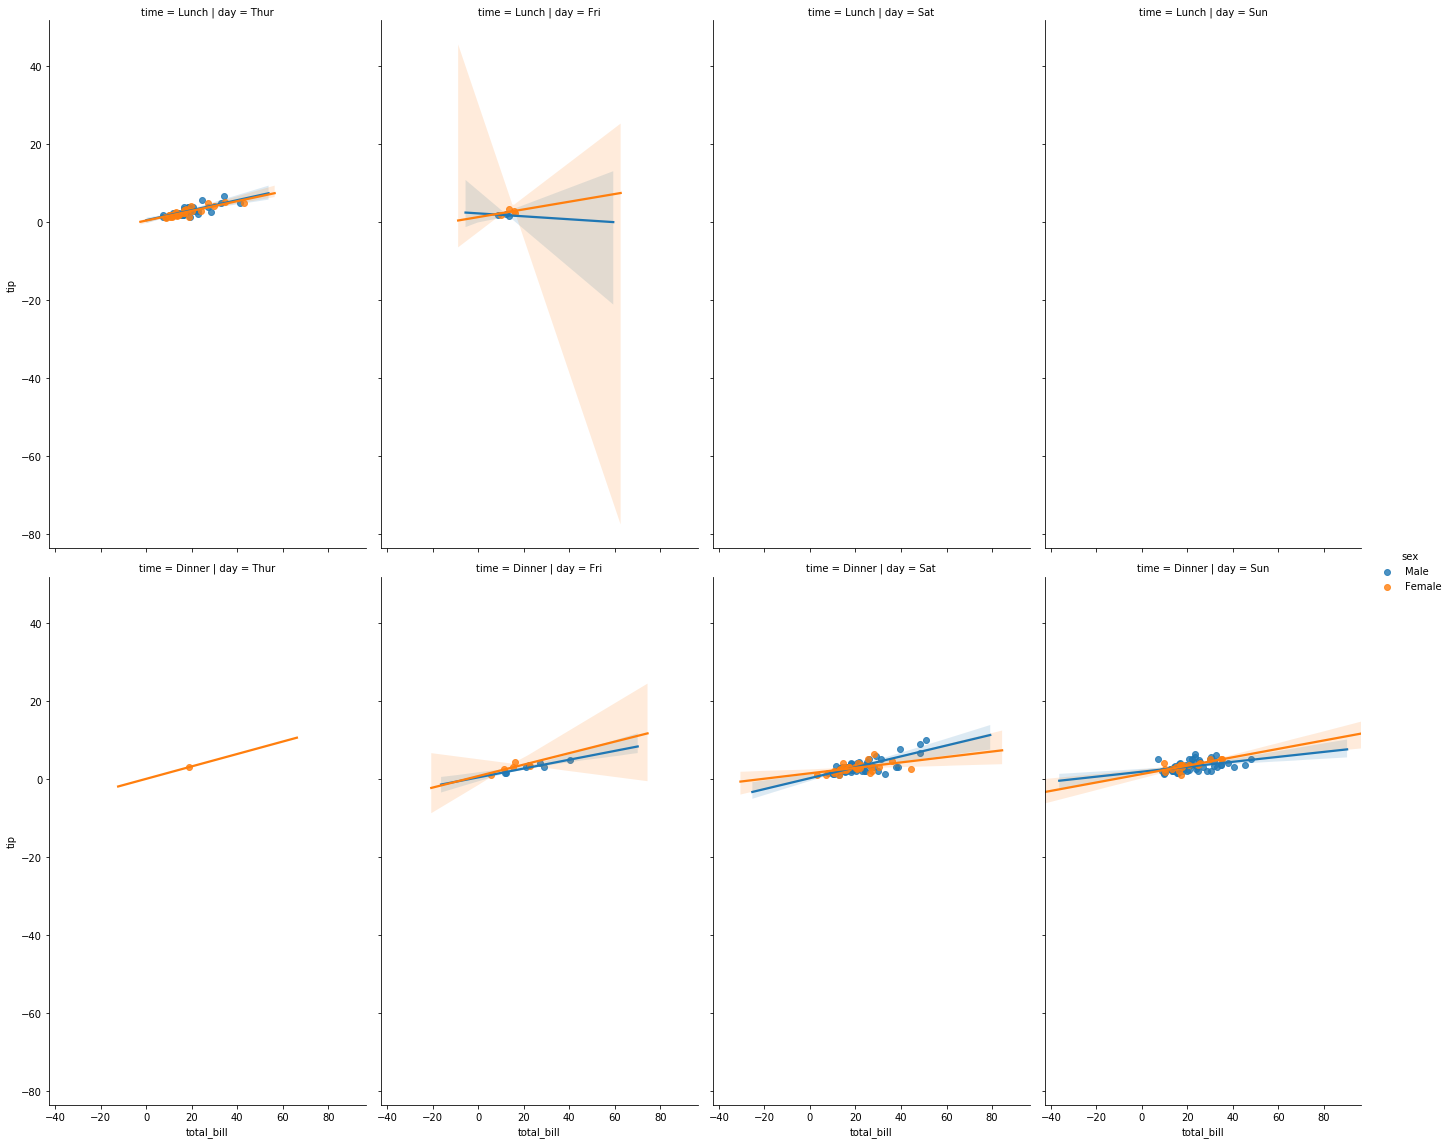

In [91]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', col='day', row='time',
           aspect=0.6, size=8)